In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
matplotlib.style.use('ggplot')
pd.options.display.max_columns = None

spending = pd.read_csv('spending.csv')
health = pd.read_excel('life_expectancy.xls', sheetname=1, skiprows=2)
unnamed = [t for t in health if 'Unnamed' in t]

health.drop(health[unnamed], axis=1, inplace=True)
health.drop(health.index[0], axis=0, inplace=True)

health = health[health['country'].isin(spending['Country'].values)]
spending = spending[spending['Country'].isin(health['country'].values)]
health['population'] =  [ s.replace(' ', '') if ' ' in str(s) else s for s in health['population'] ]

h = [u'country', 'population',  u'life expectancy (male)',  u'life expectancy (female)', u'healthy life expectancy']

In [3]:
y = spending['Year']
u = spending['Unit']
c = spending['Country']
s = spending['Financing scheme']
p = spending['Provider']
m = spending['Measure']
f = spending['Function']
#units = ['Percentage', 'Euro', 'US Dollar']
current_PPPs = spending[(y == 2015) & (u == 'US Dollar') & (f == 'Current expenditure on health (all functions)')
                         & (s == 'All financing schemes') & (p == 'All providers') 
                         & (m == 'Current prices, current PPPs')]

    
rows = ['Country', 'Value']
current_PPPs = current_PPPs.sort_values(by=rows, ascending=[1,0])
current_PPPs[rows]

,Country,Value
97871,Australia,1.051082e+05
63,Austria,4.301541e+04
223,Belgium,5.191547e+04
161339,Canada,1.652212e+05
287609,Chile,3.111954e+04
124522,Czech Republic,2.596284e+04
351252,Denmark,2.797484e+04
213244,Estonia,2.396016e+03
158219,Finland,2.179696e+04
225883,France,2.927051e+05


In [4]:
rows = ['country','healthy life expectancy', 'population']
health.sort_values(by=rows, ascending=[1,0,0], inplace=True)

health[h]

,country,population,life expectancy (male),life expectancy (female),healthy life expectancy
9,Australia,23969,80.9,84.8,71.9
10,Austria,8545,79.0,83.9,72.0
17,Belgium,11299,78.6,83.5,71.1
32,Canada,35940,80.2,84.1,72.3
35,Chile,17948,77.4,83.4,70.4
46,Czech Republic,10543,75.9,81.7,69.4
49,Denmark,5669,78.6,82.5,71.2
58,Estonia,1313,72.7,82.0,68.9
61,Finland,5503,78.3,83.8,71.0
62,France,64395,79.4,85.4,72.6


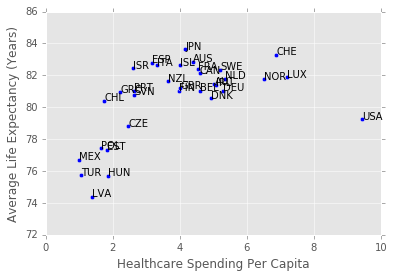

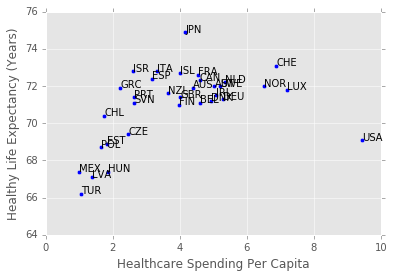

In [5]:
total_expenditure = pd.to_numeric(current_PPPs['Value'].values, errors='coerce')
population = pd.to_numeric(health['population'].values, errors='coerce') 


life_expectancy_men = pd.to_numeric(health['life expectancy (male)'].values, errors='coerce')
life_expectancy_women = pd.to_numeric(health['life expectancy (female)'].values, errors='coerce')
avg_life_expectancy = np.add(life_expectancy_men, life_expectancy_women)
avg_life_expectancy = np.divide(avg_life_expectancy, 2)

healthy_life_expectancy = pd.to_numeric(health['healthy life expectancy'].values, errors='coerce')

x = np.divide(total_expenditure, population)


titles = ['Average Life Expectancy (Years)', 'Healthy Life Expectancy (Years)']
life_expectancies = [avg_life_expectancy, healthy_life_expectancy]


for i, y in enumerate(life_expectancies):
    
    fig, ax = plt.subplots()

    plt.scatter(x, y)
    plt.xlabel('Healthcare Spending Per Capita')
    plt.ylabel(titles[i])

    for i, country in enumerate(current_PPPs['LOCATION']):
        ax.annotate(country, (x[i],y[i]))

    plt.show()